<a href="https://colab.research.google.com/github/vifirsanova/nlp-course/blob/main/tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практикум: подготовка к созданию ПО для контент-анализа Telegram

#### Шаг 1: выгрузка данных из Telegram-канала

- выбираем любой Telegram-канал
- находим меню для экспортирования (выгрузки) истории канала
- снимаем все галочки, нам понадобятся только тексты
- настраиваем максимальный размер файла, например, 8 МБ
- выбираем формат `JSON`
- настраиваем папку, куда будут выгружены наши файлы
- дополнительно можно ограничить время публикаций, например, выгрузить данные только за последний месяц

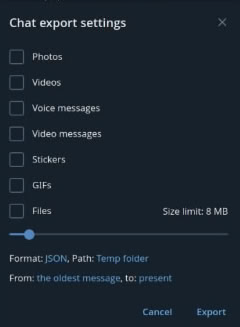

Telegram предлагает нам 2 формата выгрузки данных: `JSON` и `HTML`

**Вопрос:** чем отличаются эти форматы? Где они используются?

Загружаем `result.json` в файловую систему Google Colab

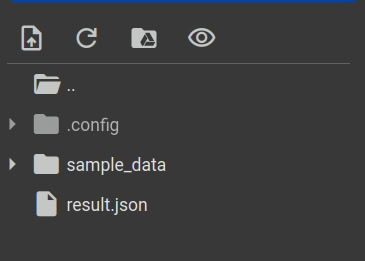

#### Шаг 2: загрузка файла `result.json`

In [ ]:
import json

# Загрузка данных
with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)

**Вопрос:** что означает `r`? Зачем указывать кодировку файла?

#### Шаг 3: сохраняем все тексты в переменную `texts`

Изучим наш файл. Откройте предпросмотр `result.json`: в выгруженном файле очень много данных, но нам нужен только ключ `text`, именно там хранятся все тексты

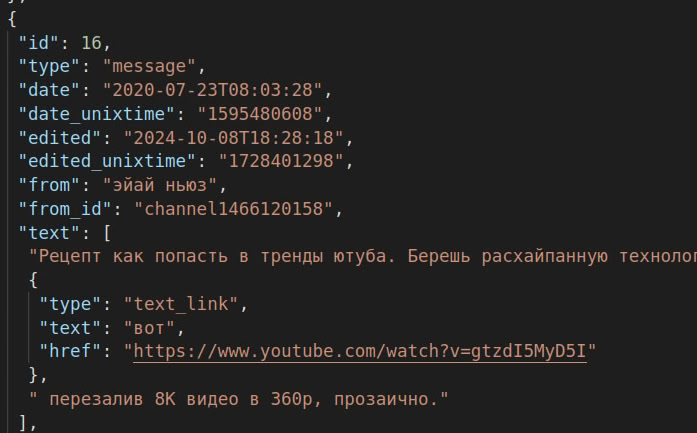

`JSON` в Python эквивалентен типу данных `dict`

In [ ]:
type(data)

dict

Выведем список ключей для нашего файла

In [ ]:
data.keys()

dict_keys(['name', 'type', 'id', 'messages'])

Нужная информация должна храниться в `messages`. Выведем все ключи для первого элемента `messages`

In [ ]:
data['messages'][0].keys()

dict_keys(['id', 'type', 'date', 'date_unixtime', 'actor', 'actor_id', 'action', 'title', 'text', 'text_entities'])

Мы нашли ключ `text`

**Задание:** выведите на экран несколько примеров текстов из нашего `JSON` и создайте список текстов из нашего документа

```
ПОДСКАЗКА

- создайте список `texts`
- выполните цикл `for` для каждого сообщения по ключу `messages`
- проверьте тип данных элемента по ключу `['text']`: в нашем документе это могут быть строки или списки
  - если текущий элемент по ключу `['text']` представляет собой список, то
    - для каждого элемента данного списка проверьте его тип данных:
      - если это строка, занесите ее в список `texts`
      - иначе: занесите в список `texts` данные, доступные по ключу `text`
  - иначе: занесите в список `texts` данные, доступные по ключу `text`
```

In [ ]:
### Ваш код здесь ###

Посмотрим на результат

**Задание:** импортируйте модуль `random` и выведите первые 100 символов для 10 случайных текстов

```
ПОДСКАЗКА

- с помощью метода `random.sample` создайте список `sample_texts` из 10 случайных текстов из списка `texts`
- с помощью цикла `for` для каждого текста выведите первые 100 символов каждого элемента
```

In [ ]:
### Ваш код здесь ###

**Вопрос:** проанализируйте результат, какие методы предобработки данных нам нужны?

#### Шаг 4: чистка текста с помощью регулярных выражений

**Основы работы с регулярными выражениями в Python**

```python
import re
```

**Основные функции модуля RE**

```python
re.match(r'pattern', string)   # Совпадение в начале строки
re.search(r'pattern', string)  # Первое совпадение в строке
re.findall(r'pattern', string) # Все совпадения в списке
re.sub(r'pattern', 'repl', string)  # Замена
re.split(r'pattern', string)   # Разделение по шаблону
```

**Символы в RE**

| Шаблон | Значение |
|--------|----------|
| `.`  | Любой символ, кроме `\n` |
| `\d` | Цифра `[0-9]` |
| `\s` | Пробел |
| `\w` | Буква/цифра/`_` |
| `+`  | 1 или более повторений |
| `*`  | 0 или более |
| `?`  | 0 или 1 |
| `^`  | Начало строки |
| `$`  | Конец строки |
| `[]` | Любой из символов |
| `()` | Группа |

Примеры:

```python
re.findall(r'\d+', 'abc123def456')  # Поиск всех совпадений ['123', '456']
re.sub(r'\d+', 'X', 'abc123def456')  # Удаление (фильтрация) 'abcXdefX'
re.split(r'\s+', 'word1   word2')  # Сегментация ['word1', 'word2']
```

Создание шаблонов для повторного использования:

```python
pattern = re.compile(r'\d+')
pattern.findall('abc123def456')  # ['123', '456']
```

**Задание:** выберите паттерн для очистки ваших данных и произведите чистку

```
ПОДСКАЗКА

- импортируйте модуль `re`
- создайте пустой список cleaned_text
- выберите шаблоны для вашего текста, например
  - "https?://\S+" - удаление ссылок
  - "[@#]\w+" - удаление хештегов и упоминаний других пользователей
- примените `re.sub`, чтобы произвести замены совпадений на пустые строки ""
- добавьте очищенные тексты в список `cleaned_text`
```

In [ ]:
### Ваш код здесь ###

#### Шаг 5: удаление стоп-слов

**Вопрос:** как понять, что данное слово нужно удалить из текста?

**Задание:** удалите стоп-слова с помощью списка стоп-слов из `spacy`

Загрузим список стоп-слов для русского языка

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("russian"))

```
ПОДСКАЗКА

- создаем список `cleaned_words`
- для каждого нашего текста внутри цикла `for`
- делим текст на слова (text.split())
- приводим слова к нижнему регистру
- если слова нет в списке `stopwords`, добавляем их в список `cleaned_words`
```

In [ ]:
### Ваш код здесь ###

#### Шаг 6: анализ текста

**Вопрос:** какая информация полезна для контент-анализа?

**Задание:** произвести разметку именованных сущностей с помощью `spacy`



Загружаем русскоязычую модель `spacy`

In [ ]:
!python3 -m spacy download ru_core_news_sm -q

Производим разметку

In [ ]:
import spacy

# Загружаем модель для русского языка
nlp = spacy.load("ru_core_news_sm")

entities = []
for text in cleaned_texts:
    doc = nlp(text)
    # Добавляем метку сущности в список
    entities.extend([ent.label_ for ent in doc.ents])

Визуализируем результат

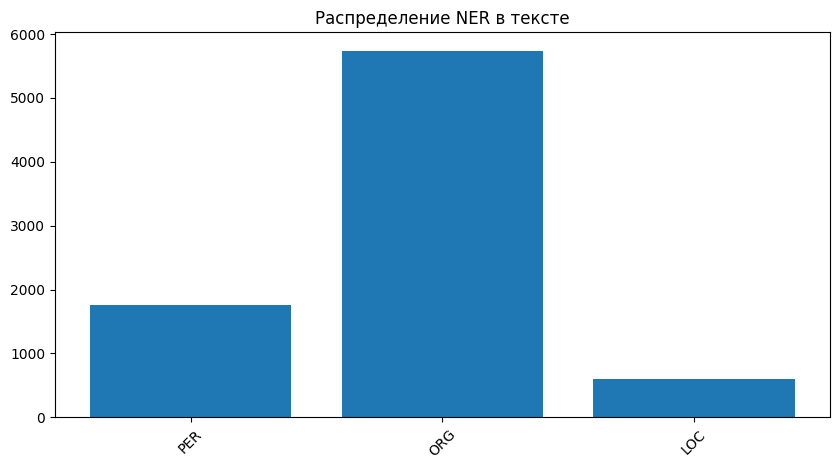

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Гистограмма NER
entity_counts = Counter(entities) # Посчитаем количество вхождений именованных сущностей
plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xticks(rotation=45)
plt.title("Распределение NER в тексте")
plt.show()

In [ ]:
# PoS-анализ
pos_counts = Counter()
for text in cleaned_texts:
    doc = nlp(text)
    pos_counts.update([token.pos_ for token in doc])

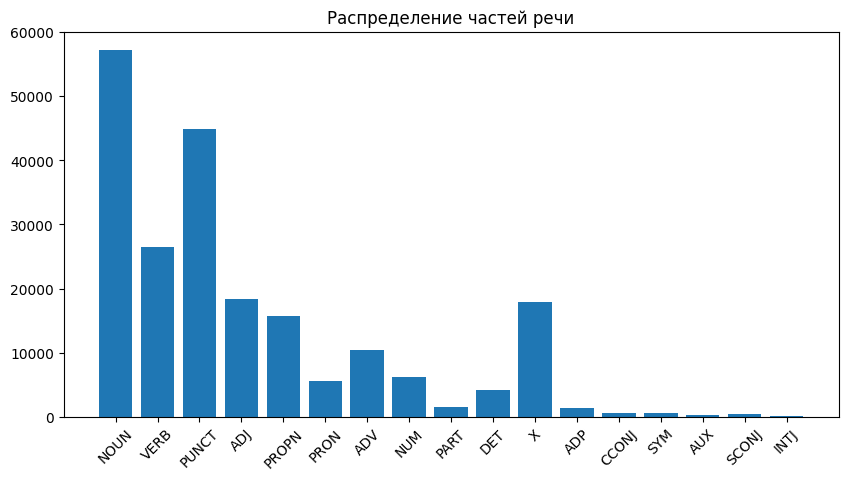

In [ ]:
# Гистограмма PoS
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xticks(rotation=45)
plt.title("Распределение частей речи")
plt.show()

**Вопрос:** какие методы анализа текста доступны в Spacy?

### Домашнее задание

1. Улучшить очистку данных
  - добавить удаление знаков препинания
  - добавить удаление слов, написанных латиницей
2. Лемматизировать текст
3. Создать частотный словарь лемм с помощью `Counter`
4. Построить гистограмму 20 наиболее частотных лемм
5. С помощью random.sample выбрать случайный текст из нашей выборки: если в этом тексте есть именованные сущности (найдите их с помощью spacy), сделать визуализацию разметки с помощью displacy

```
ПОДСКАЗКА (задание 5)

- записываем в переменную sample случайный текст из выборки
- производим разметку NER
- с помощью IF проверяем, пустой список или нет
- если список именованных сущностей не пустой, передаем текст в displacy

Образец использования displacy:

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("He works at Google.")
spacy.displacy.serve(doc, style="ent")
```

Полезные материалы:

- https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-regular-expressions-in-natural-language-processing/ - RegEx для обработки естественного языка
- https://spacy.io/api/doc - документация SpaCy